In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def initialize(no_of_next_units, no_of_prev_units):
    W = np.random.randn(no_of_next_units, no_of_prev_units)
    b = np.zeros((no_of_next_units,1))
    return W, b
def sigmoid(x):
    return(1/(1+np.exp(-x)))
def deriv_sigmoid(x):
    return(sigmoid(x)*(1-sigmoid(x)))
def loss(A, Y):
    return (1/2)*np.linalg.norm(A-Y)
def stochastic_gradient_descent(input_layer, hidden_units, output_layer):
    learning_rate = 0.9
    W1, b1 = initialize(hidden_units, input_layer.shape[0])
    W2, b2 = initialize(output_layer.shape[0], hidden_units)
    for i in range(1000):
        index = int(np.floor(np.random.randn()%input_layer.shape[1]))
        X = input_layer[:, index]
        X = X.reshape(input_layer.shape[0], 1)
        Y = output_layer[:, index]
        Y = Y.reshape(output_layer.shape[0], 1)
        Z1 = np.dot(W1, X)+b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1)+b2
        A2 = sigmoid(Z2)
        dZ2 = (Y-A2)*deriv_sigmoid(Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)*(1-np.square(A1))
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        W1 = W1 + learning_rate*dW1
        W2 = W2 + learning_rate*dW2
        b1 = b1 + learning_rate*db1
        b2 = b2 + learning_rate*db2
        if(i%100 == 0):
            print("Loss after ", i, "th iteration: ", loss(A2, Y))
    return W1, W2, b1, b2

In [0]:
def predict(W1, W2, b1, b2, X):
    return np.round(sigmoid(np.dot(W2, np.tanh(np.dot(W1, X)+b1))+b2))

In [16]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]]).T
X = (X-np.mean(X, keepdims = True, axis = 1))/np.var(X, keepdims = True, axis = 1)
Y = np.array([0, 1, 1, 0]).reshape(1, 4)
W1, W2, b1, b2 = stochastic_gradient_descent(X,3,Y)

Loss after  0 th iteration:  0.1943795247273539
Loss after  100 th iteration:  0.07331267335401974
Loss after  200 th iteration:  0.0701790452946549
Loss after  300 th iteration:  0.026083049294852417
Loss after  400 th iteration:  0.04609072888751849
Loss after  500 th iteration:  0.05748082970673457
Loss after  600 th iteration:  0.05115359234407807
Loss after  700 th iteration:  0.040102148276640326
Loss after  800 th iteration:  0.0387442672783429
Loss after  900 th iteration:  0.007392484091790429


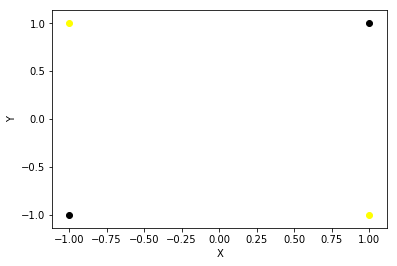

In [17]:
if(predict(W1, W2, b1, b2, np.array([[-1],[-1]]))[0][0] == 1):
    plt.scatter(-1, -1, c="yellow")
else:
    plt.scatter(-1, -1, c="black")
if(predict(W1, W2, b1, b2, np.array([[-1],[1]]))[0][0] == 1):
    plt.scatter(-1, 1, c="yellow")
else:
    plt.scatter(-1, 1, c="black")
if(predict(W1, W2, b1, b2, np.array([[1],[-1]]))[0][0] == 1):
    plt.scatter(1, -1, c="yellow")
else:
    plt.scatter(1, -1, c="black")
if(predict(W1, W2, b1, b2, np.array([[1],[1]]))[0][0] == 1):
    plt.scatter(1, 1, c="yellow")
else:
    plt.scatter(1, 1, c="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

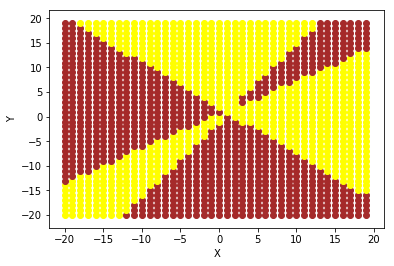

In [18]:
for i in range(-20, 20):
    for j in range(-20, 20):
        if(predict(W1, W2, b1, b2, np.array([[i],[j]]))[0][0] == 1):
            plt.scatter(i, j,c="brown")
        else:
            plt.scatter(i, j,c="yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()